In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot


% matplotlib inline

In [3]:
germany_energy_data = pd.read_csv('Germany_Energy_TimeSeries.csv')

In [4]:
print(germany_energy_data.shape)

print(germany_energy_data.head(5))

print(germany_energy_data.tail(5))

(4383, 5)
       Date  Consumption  Wind  Solar  Wind_Solar
0  1/1/2006     1069.184   NaN    NaN         NaN
1  1/2/2006     1380.521   NaN    NaN         NaN
2  1/3/2006     1442.533   NaN    NaN         NaN
3  1/4/2006     1457.217   NaN    NaN         NaN
4  1/5/2006     1477.131   NaN    NaN         NaN
            Date  Consumption     Wind   Solar  Wind_Solar
4378  12/27/2017   1263.94091  394.507  16.530     411.037
4379  12/28/2017   1299.86398  506.424  14.162     520.586
4380  12/29/2017   1295.08753  584.277  29.854     614.131
4381  12/30/2017   1215.44897  721.247   7.467     728.714
4382  12/31/2017   1107.11488  721.176  19.980     741.156


In [5]:
germany_energy_data.dtypes

Date            object
Consumption    float64
Wind           float64
Solar          float64
Wind_Solar     float64
dtype: object

In [6]:
germany_energy_data['Date'] = pd.to_datetime(germany_energy_data['Date'])
germany_energy_data.dtypes

Date           datetime64[ns]
Consumption           float64
Wind                  float64
Solar                 float64
Wind_Solar            float64
dtype: object

In [7]:
germany_energy_data.index

RangeIndex(start=0, stop=4383, step=1)

In [9]:
germany_energy_data = germany_energy_data.set_index('Date')
germany_energy_data.index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq=None)

In [14]:
# Alternate Method
#germany_energy_data = pd.read_csv('Germany_Energy_TimeSeries.csv', index_col=0, parse_dates=True)
#germany_energy_data.dtypes

Consumption    float64
Wind           float64
Solar          float64
Wind_Solar     float64
dtype: object

In [10]:
germany_energy_data.index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq=None)

In [11]:
# Add columns with year, month, and weekday name
germany_energy_data['Year'] = germany_energy_data.index.year
germany_energy_data['Month'] = germany_energy_data.index.month
germany_energy_data['Weekday Name'] = germany_energy_data.index.weekday_name

In [17]:
germany_energy_data.reset_index().head()
# germany_energy_data.loc['2017-08-10']
germany_energy_data.loc['2017-01-20':'2017-01-22']


,Consumption,Wind,Solar,Wind_Solar,Year,Month,Weekday Name
Date,,,,,,,
2017-01-20,1641.737,109.383,39.633,149.016,2017,1,Friday
2017-01-21,1423.020,78.893,45.477,124.370,2017,1,Saturday
2017-01-22,1340.341,50.774,47.386,98.160,2017,1,Sunday


In [20]:
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})

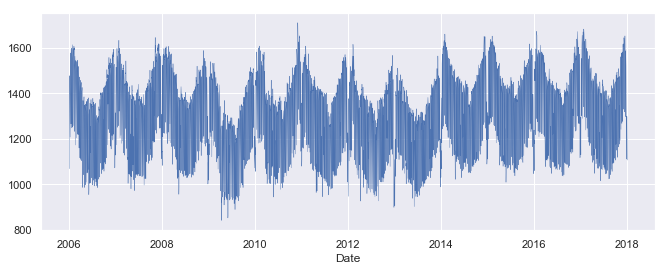

In [23]:
germany_energy_data['Consumption'].plot(linewidth=0.4);


In [24]:
column_plot = ['Consumption', 'Solar', 'Wind']

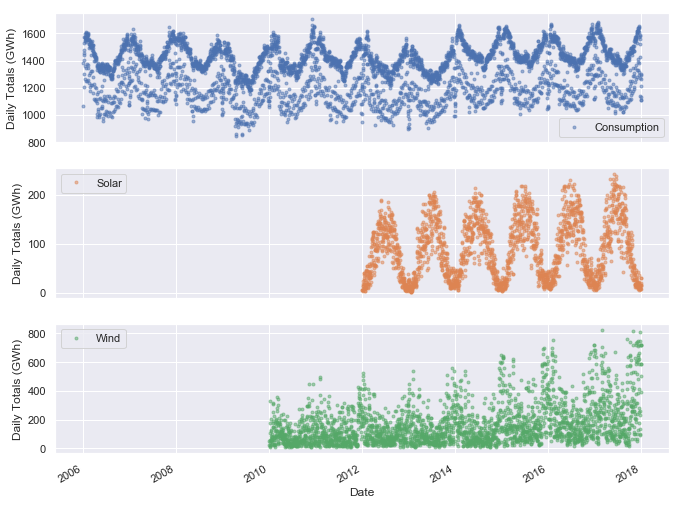

In [25]:
axes = germany_energy_data[column_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Totals (GWh)')

Text(0,0.5,'Daily Consumption(GWh)')

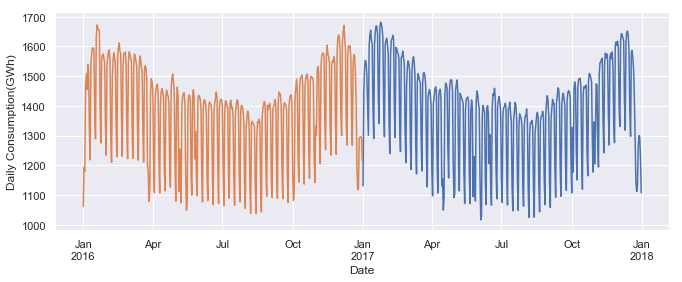

In [31]:
# Zoom in to a year
#Plot for 2017
mplot = germany_energy_data.loc['2017', 'Consumption'].plot()

#Plot for 2016
mplot = germany_energy_data.loc['2016', 'Consumption'].plot()

mplot.set_ylabel('Daily Consumption(GWh)')

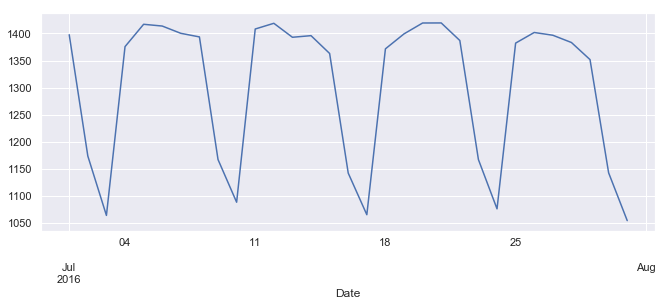

In [32]:
# Zoom in to a month

#Plot for July 2016
mplot = germany_energy_data.loc['2016-07', 'Consumption'].plot()

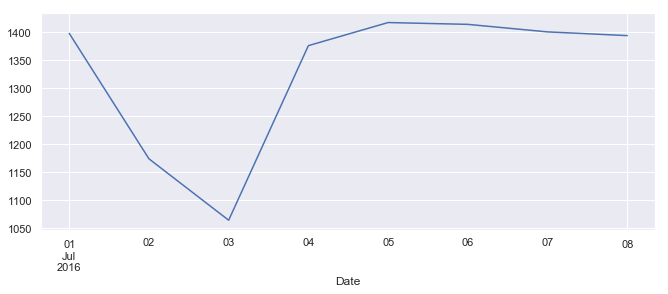

In [33]:
# Zoom in to a week

#Plot for July 2016
mplot = germany_energy_data.loc['2016-07-01':'2016-07-08', 'Consumption'].plot()

In [34]:
# Customizing the axes to view weekly granularity
import matplotlib.dates as mdates


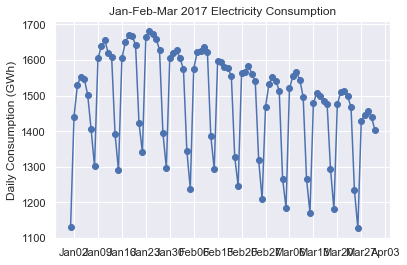

In [42]:
fig, ax = plt.subplots()
ax.plot(germany_energy_data.loc['2017-01':'2017-03', 'Consumption'], marker='o', linestyle='-')
ax.set_ylabel('Daily Consumption (GWh)')
ax.set_title('Jan-Feb-Mar 2017 Electricity Consumption')

# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))

# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b%d'));

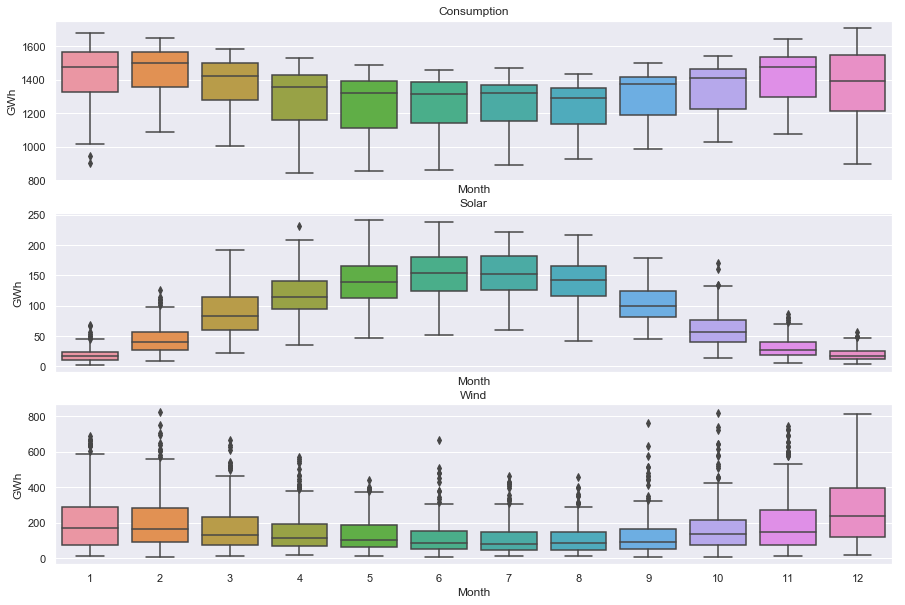

In [47]:
# Exploring Seasonality with Boxplots
fig, axes = plt.subplots(3, 1, figsize=(15, 10), sharex=True)
for name, ax in zip(['Consumption', 'Solar', 'Wind'], axes):
    sns.boxplot(data=germany_energy_data, x='Month', y=name, ax=ax)
    ax.set_ylabel('GWh')
    ax.set_title(name)

    # Remove the automatic x-axis label from all but the bottom subplot
    #if ax != axes[-1]:
#         ax.set_xlabel('')

Index(['Consumption', 'Wind', 'Solar', 'Wind_Solar', 'Year', 'Month',
       'Weekday Name'],
      dtype='object')

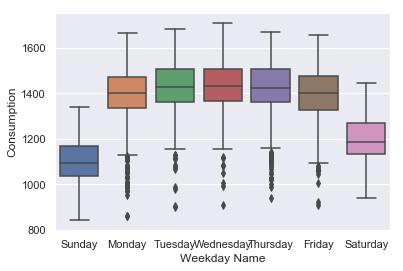

In [49]:
# Groupinf Electricity Consumption on weekly basis, to observe seasonality
sns.boxplot(data=germany_energy_data, x='Weekday Name', y='Consumption');

germany_energy_data.columns


Index(['Consumption', 'Wind', 'Solar', 'Wind_Solar', 'Year', 'Month',
       'Weekday Name'],
      dtype='object')

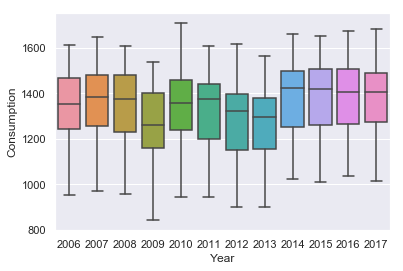

In [51]:
# Groupinf Electricity Consumption on weekly basis, to observe seasonality
sns.boxplot(data=germany_energy_data, x='Year', y='Consumption');

germany_energy_data.columns

In [72]:
# Trend decomposition using statsmodels

from statsmodels.tsa.seasonal import seasonal_decompose
consumption_df = germany_energy_data['Consumption']

# print(result.seasonal)
# print(result.resid)
# print(result.observed)

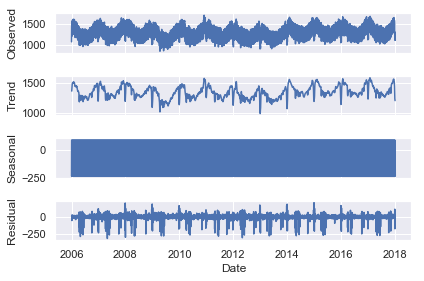

In [73]:
result = seasonal_decompose(consumption_df, model='additive')
#print(result.trend)

result.plot()
plt.show()